# Import libraries

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Data

In [245]:
data = pd.read_csv('data/heart.csv')

In [246]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [247]:
data.shape

(1025, 14)

# Preprocessing 
- Split our dataset into attributes and labels

In [248]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [249]:
X = data.iloc[:, :-1]
y = data.iloc[:, 13]

**The X contains all of the labels in our dataset, except for the target**  
**The y is our prediction variable, and it contains the last column**

# Train Test Split

We need to avoid overfitting.  In order to do this, we divide our data into training and test splits.  This will give us a better idea of how our algorithm performed during our testing phase. 
This way our algorithm is tested on un-seen data.  This is usual of production application. 

In [250]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

The above tells python to split the datasets into 80% training data and into 20% test data.  
This means that out of 1025 records, 820 will be used to train the data and 205 will be used to test it.  

# Feature Scaling

In [251]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Prediction

In [252]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [253]:
y_pred = classifier.predict(X_test)

# Evaluation the Algorithm

In [254]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[89  4]
 [16 96]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        93
           1       0.96      0.86      0.91       112

    accuracy                           0.90       205
   macro avg       0.90      0.91      0.90       205
weighted avg       0.91      0.90      0.90       205



**The algorithm was able to classify the 205 records for 0 with 84% accuracy, and for 1 with 82% accuracy.**

In [255]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

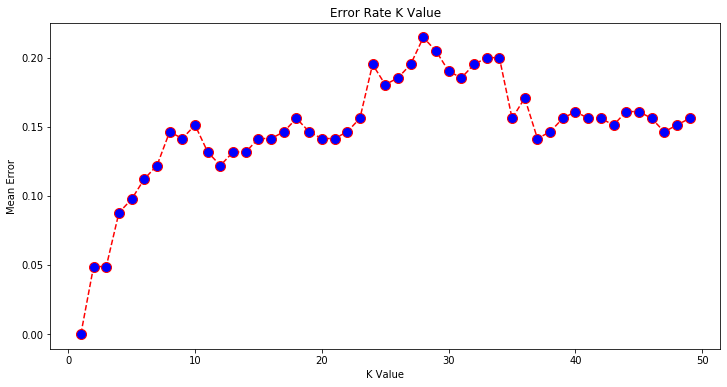

In [256]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [257]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Prediction 

Suppose I have a patient with thw following information

In [258]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [259]:
new_patient = pd.DataFrame({
 'age'      : 24,
 'sex'      : 1,
 'cp'       : 0,
 'trestbps' : 120,
 'chol'     : 155,
 'fbs'      : 0,
 'restecg'  : 0,
 'thalach'  : 210,
 'exang'    : 0,
 'oldpeak'  : 0,
 'slope'    : 2,
 'ca'       : 1,
 'thal'     : 0

}, index = [0])

In [260]:
new_patient

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,24,1,0,120,155,0,0,210,0,0,2,1,0


In [261]:
knn.predict(new_patient)

array([1], dtype=int64)